## Time Series Norway Car Sales 2007-2017 

In [14]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [15]:
df_month = pd.read_csv('data/norway_new_car_sales_by_month.csv', sep=',', header=0)
df_month.head(5)

Year  Month  Quantity  Quantity_YoY  Import  Import_YoY  Used  Used_YoY  \
0  2007      1     12685          5227    2276         257   NaN       NaN   
1  2007      2      9793          2448    1992         -89   NaN       NaN   
2  2007      3     11264          1445    2626          45   NaN       NaN   
3  2007      4      8854           504    2220        -130   NaN       NaN   
4  2007      5     12007          1592    2881           7   NaN       NaN   

   Avg_CO2  Bensin_Co2  Diesel_Co2  Quantity_Diesel  Diesel_Share  \
0      152         155         152            10072          79.4   
1      156         159         155             7222          73.7   
2      159         161         158             7965          70.7   
3      160         165         158             6116          69.1   
4      160         163         159             8519          71.0   

   Diesel_Share_LY  Quantity_Hybrid  Quantity_Electric  Import_Electric  
0             52.5              NaN                NaN              NaN  
1             47.4              NaN                NaN              NaN  
2             48.1              NaN                NaN              NaN  
3             48.4              NaN                NaN              NaN  
4             49.1              NaN                NaN              NaN

In [16]:
df_month = df_month.fillna(0)
df_month['Day'] = '1'
df_month['Date'] = pd.to_datetime(df_month[['Year','Month', 'Day']], format = "%y-%m")
df_month['Quantity_Petrol'] = df_month['Quantity'] - df_month['Quantity_Diesel'] - df_month['Quantity_Hybrid'] - df_month['Quantity_Electric']                    
df_month['Non_Import'] = df_month['Quantity'] - df_month['Import']

In [18]:
df_month['Year_Month'] = df_month['Date'].dt.to_period('M')
df_month = df_month.drop(['Year','Month', 'Day', 'Date'], axis = 1)
df_month.head()

Quantity  Quantity_YoY  Import  Import_YoY  Used  Used_YoY  Avg_CO2  \
0     12685          5227    2276         257   0.0       0.0      152   
1      9793          2448    1992         -89   0.0       0.0      156   
2     11264          1445    2626          45   0.0       0.0      159   
3      8854           504    2220        -130   0.0       0.0      160   
4     12007          1592    2881           7   0.0       0.0      160   

   Bensin_Co2  Diesel_Co2  Quantity_Diesel  Diesel_Share  Diesel_Share_LY  \
0         155         152            10072          79.4             52.5   
1         159         155             7222          73.7             47.4   
2         161         158             7965          70.7             48.1   
3         165         158             6116          69.1             48.4   
4         163         159             8519          71.0             49.1   

   Quantity_Hybrid  Quantity_Electric  Import_Electric  Quantity_Petrol  \
0              0.0                0.0              0.0           2613.0   
1              0.0                0.0              0.0           2571.0   
2              0.0                0.0              0.0           3299.0   
3              0.0                0.0              0.0           2738.0   
4              0.0                0.0              0.0           3488.0   

   Non_Import Year_Month  
0       10409    2007-01  
1        7801    2007-02  
2        8638    2007-03  
3        6634    2007-04  
4        9126    2007-05

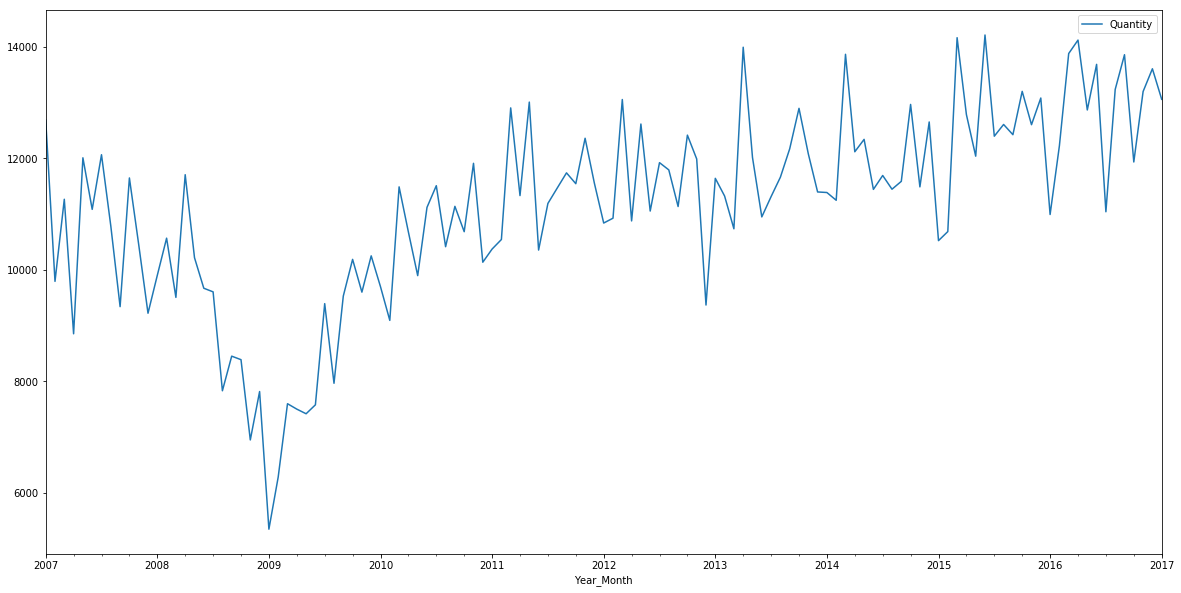

In [90]:
monthly = df_month.groupby(['Year_Month'])['Quantity'].sum().to_frame()
monthly.plot(figsize=(20,10))
plt.show()

In [19]:
monthly_petrol = df_month.groupby(['Year_Month'])['Quantity_Petrol'].sum().to_frame().reset_index()
monthly_diesel = df_month.groupby(['Year_Month'])['Quantity_Diesel'].sum().to_frame().reset_index()
monthly_hybrid = df_month.groupby(['Year_Month'])['Quantity_Hybrid'].sum().to_frame().reset_index()
monthly_electric = df_month.groupby(['Year_Month'])['Quantity_Electric'].sum().to_frame().reset_index()

df_monthly_sales = monthly_petrol.merge(monthly_diesel, on='Year_Month')
df_monthly_sales = df_monthly_sales.merge(monthly_hybrid, on='Year_Month')
df_monthly_sales = df_monthly_sales.merge(monthly_electric, on='Year_Month')

df_monthly_sales = df_monthly_sales.set_index('Year_Month')
df_monthly_sales.head()

Quantity_Petrol  Quantity_Diesel  Quantity_Hybrid  \
Year_Month                                                      
2007-01              2613.0            10072              0.0   
2007-02              2571.0             7222              0.0   
2007-03              3299.0             7965              0.0   
2007-04              2738.0             6116              0.0   
2007-05              3488.0             8519              0.0   

            Quantity_Electric  
Year_Month                     
2007-01                   0.0  
2007-02                   0.0  
2007-03                   0.0  
2007-04                   0.0  
2007-05                   0.0

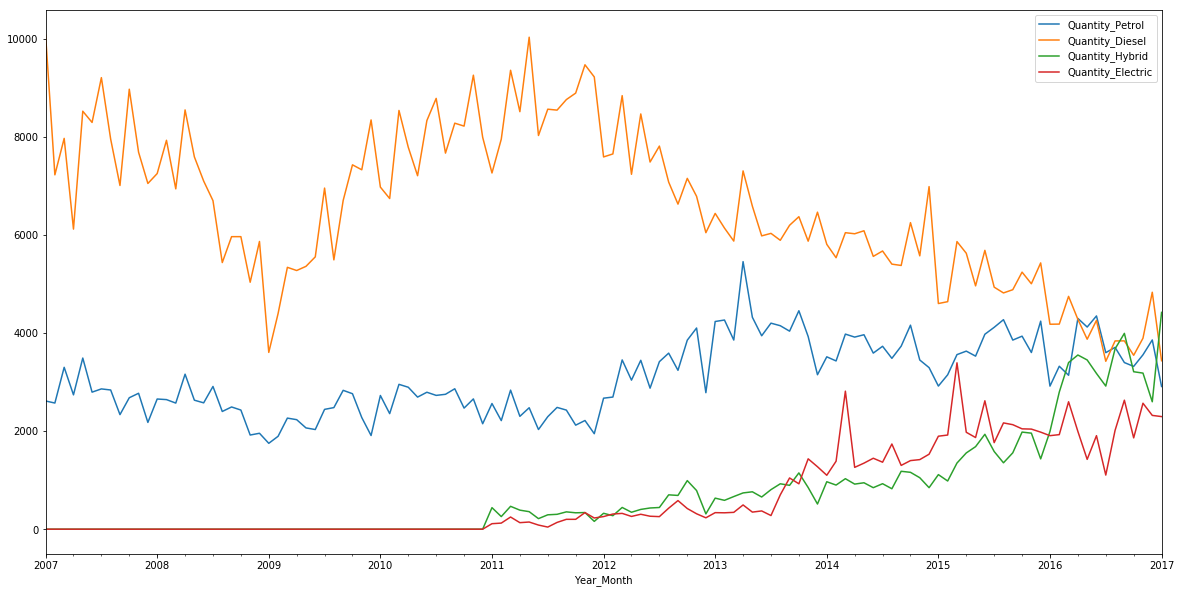

In [20]:
df_monthly_sales.plot(figsize=(20,10))

plt.show()

In [21]:
monthly_non_import = df_month.groupby(['Year_Month'])['Non_Import'].sum().to_frame().reset_index()
monthly_import = df_month.groupby(['Year_Month'])['Import'].sum().to_frame().reset_index()

df_monthly_imports = monthly_non_import.merge(monthly_import, on='Year_Month')

df_monthly_imports = df_monthly_imports.set_index('Year_Month')
df_monthly_imports.head()

Non_Import  Import
Year_Month                    
2007-01          10409    2276
2007-02           7801    1992
2007-03           8638    2626
2007-04           6634    2220
2007-05           9126    2881

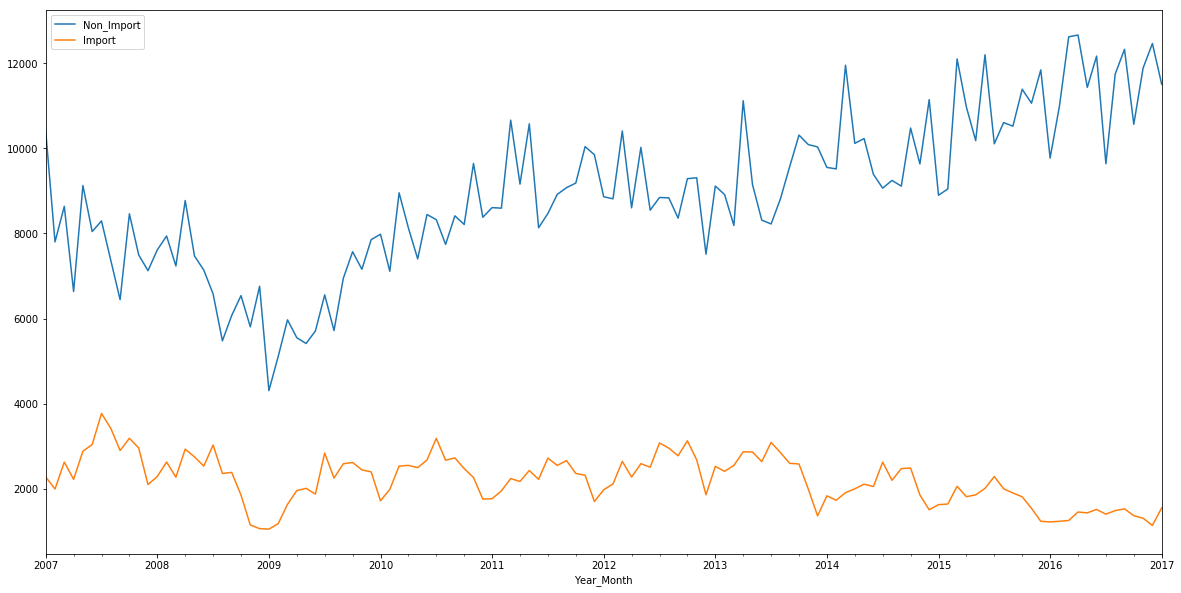

In [22]:
df_monthly_imports.plot(figsize=(20,10))
plt.show()

In [52]:
df_make = pd.read_csv('data/norway_new_car_sales_by_make.csv', sep=',', header=0)
df_make.head()

Year  Month        Make  Quantity   Pct
0  2007      1      Toyota      2884  22.7
1  2007      1  Volkswagen      2521  19.9
2  2007      1     Peugeot      1029   8.1
3  2007      1        Ford       870   6.9
4  2007      1       Volvo       693   5.5

In [53]:
df_make = df_make.fillna(0)
df_make['Day'] = '1'
df_make['Date'] = pd.to_datetime(df_make[['Year','Month', 'Day']], format = "%y-%m")
df_make['Year_Month'] = df_make['Date'].dt.to_period('M')
df_make = df_make.drop(['Year','Month', 'Day', 'Date'], axis = 1)
# df_make = df_make.set_index('Year_Month')
df_make.head()

Make  Quantity   Pct Year_Month
0      Toyota      2884  22.7    2007-01
1  Volkswagen      2521  19.9    2007-01
2     Peugeot      1029   8.1    2007-01
3        Ford       870   6.9    2007-01
4       Volvo       693   5.5    2007-01

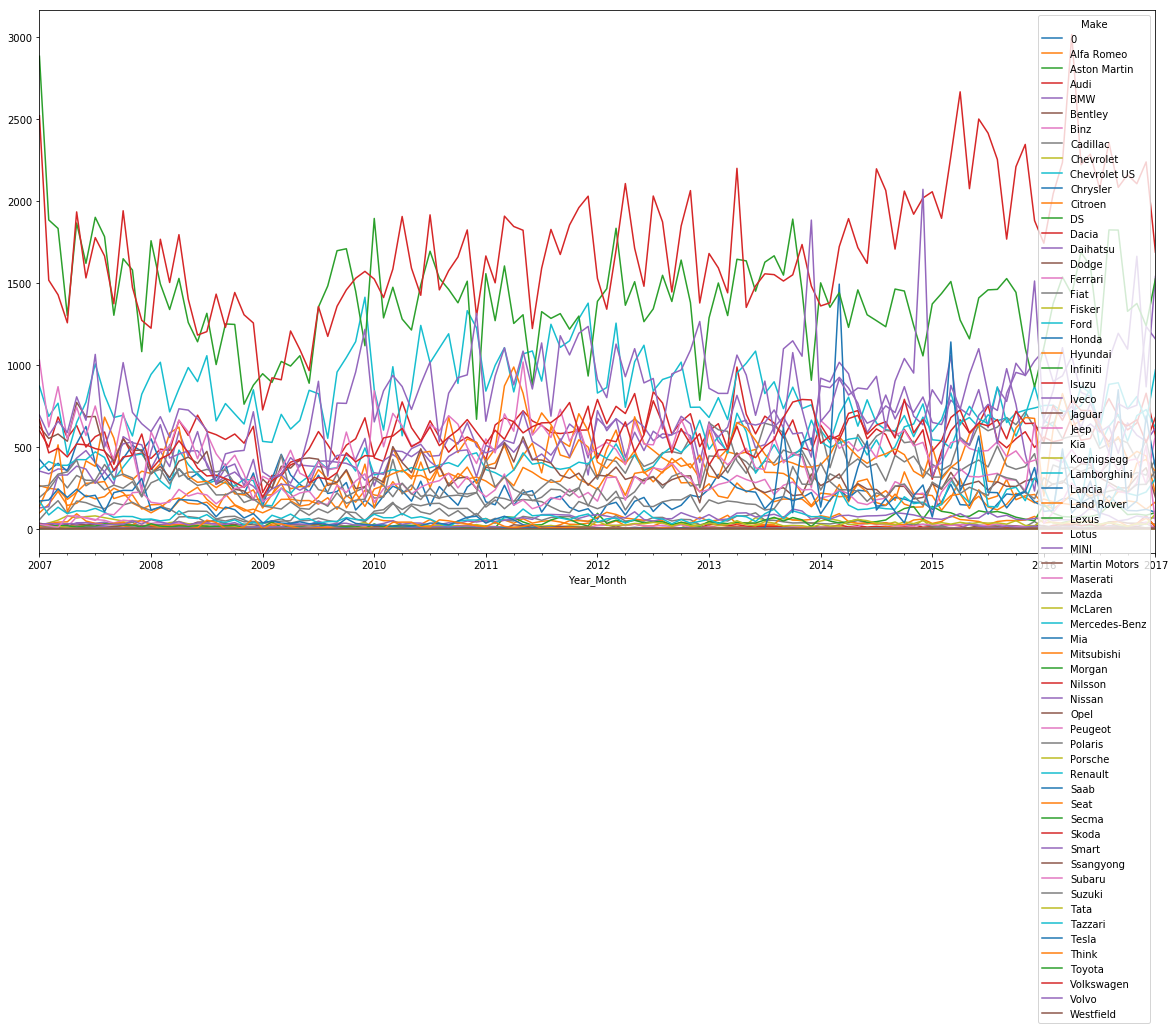

In [88]:
test = df_make.groupby(['Year_Month', 'Make'])['Quantity'].sum().unstack().fillna(0)
test.head()
test.plot(figsize=(20,10))
plt.show()